# Introducing the UA Campus HPC

### Questions:
- What is a super computer?
- How do I login to th HPC?
- What is a Bastion host?
- What is a login node?
- What is a job scheduler?
- What is a node?
- Why do I need to use an HPC?
- Where do I store my files?
- How can I run jobs interactively?
- What software can I run?
- What are batch jobs?
- Show me some examples...

### Objectives:
- Learn how to runs jobs on the campus HPC (you will be guided through ths via Jupter notebooks!)
- Learn about the different computers that make up an HPC
- Learn how to use high-performance computing techniques to run many jobs at once

### Keypoints:

- The campus HPC is an amazing resource! We are so lucky.


### Getting Started

Before we get started you will need to set your netid and then go into the directory for this assignment under bh_class.

You will need to rerun this section each time you come back to this notebook to reset the variables.

Remember, our notebooks work in the current working directory -- and when you login to the HPC this automatically is your home directory. You will need to move to the project directory for each exercise and assignment. The next two cells set your netid and the project directory (be sure to replace "MY_NETID" with your actual netid). Then we will change into that directory for our exercise.

In [ ]:
# Make sure you have the most up to date code
%cd ~/be487-fall-2024
!git stash
!git pull

In [ ]:
# Change "MY_NETID" to your netid below, and run this cell
netid = "MY_NETID"

In [ ]:
# Set the working directory and change into this directory
work_dir = "/xdisk/bhurwitz/bh_class/" + netid + "/assignments/01_getting_started"
%cd $work_dir

# What's a supercomputer?
A supercomputer is a collection, or cluster, of a large number of regular computers (referred to as compute nodes) connected over a network. Each of the computers is like a local workstation though typically much more capable. For example, a standard laptop might have 4 CPUs and 8gb of RAM. Compare this with a standard compute node on Puma which has a whopping 94 CPUs and 470gb of RAM!

<br>
Another thing that differentiates supercomputers from your personal workstation is a supercomputer is a shared resource. This means there may be hundreds or even thousands of simultaneous users. Without some sort of coordination, you can imagine it would be a logistical nightmare to figure out who can run their code, what resources they can use, and where they should run it. That's why supercomputers use login nodes and job schedulers (we use one called SLURM).

<br>

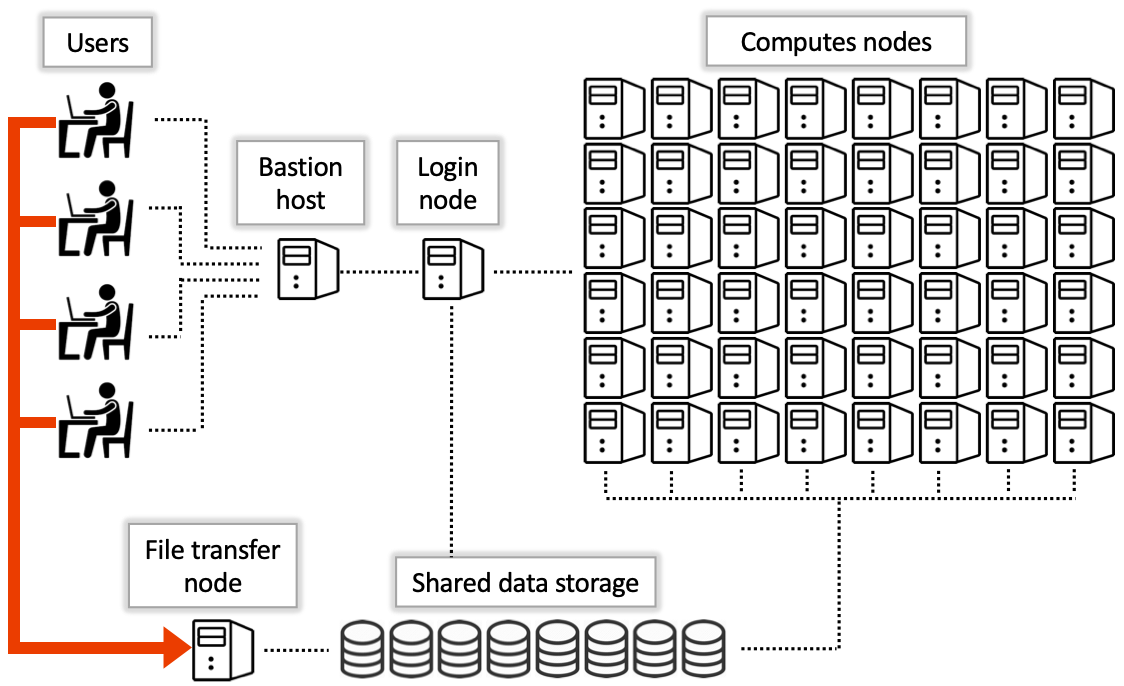

## Logging into the HPC.
In past exercises, you have learned how to login to the HPC and have either used the [ondemand web portal](https://ood.hpc.arizona.edu/pun/sys/dashboard), or you have logged in directory via a shell program from your laptop. If you login from the HPC ondemand portal using the Clusters -> Shell from the menu, you will be directed to the Bastion host, where you will get to choose which cluster you would like to login to. 

## What is a Bastion host?
After a successful login, you will be connected to the bastion host. This is a single computer that provides a gateway to our three clusters. This is the only function the bastion host serves. It is not for storing files, running programs, or accessing software. The hostname of this machine is gatekeeper. The Bastion host allows you to connect to different login nodes for each of the clusters we have at UA. You can select from puma, ocelote, or elgato. In our class, we will use ocelote, our teaching cluster. 

## What is a login node?
When you first log into a supercomputer from the Bastion host, you're connected to something called a login node. This is a single computer that's connected to the cluster of compute nodes and is where you write and submit your jobs using a job scheduler. A login node itself is not used for performing any analyses. 

## What is a job scheduler?
A job scheduler is software used to coordinate user jobs. The job scheduler we use is called SLURM. You can use it by writing a special script that requests compute resources (e.g., CPUs, RAM, GPUs) and includes instructions for running your code. You submit this script to the job scheduler using a special command called `sbatch` and it does the work of finding the required space on the supercomputer for you. It then runs your code and returns the results to your account in a text file.

## Let's look at an analogy.
One way you might think of a supercomputer setup is as a post office and factory. Imagine you have something you need built in a factory and have a list of instructions and materials for how to do it. To achieve this, you put your instructions (code) in an addressed envelope (SLURM script), take it to a post office (login node), have postal worker (job scheduler) deliver the instructions to the factory (compute node), and then you can go home (log off). After waiting for a period of time, your completed project is delivered to you (as a text file).

## What is a node?
Here is one of the computers, or compute nodes, in Ocelote. They have the same components as a PC or workstation: there are two processor modules, memory DIMMs, an internal disk and networking ports. The power supplies are in the chassis that the compute nodes plug into. Some of the compute nodes have GPUs like the ones in your Xbox or gaming laptop that you use for Minecraft but are much more capable.

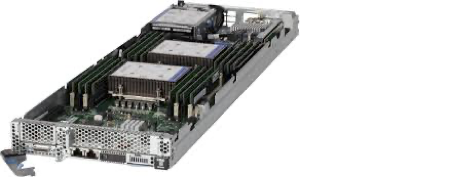

## Why should I use an HPC?
There are lots of reasons to use a supercomputer! For example, say you have analyses that require a tremendous amount of memory or storage space. It's not feasible (or very expensive) to use 3TB of memory or 10TB of disk space on a local workstation, but on our systems it's very possible (and free). This is how you scale up from the workstation under your desk. 

<br>
Another possibility is you may have thousands of metagenomes to run through quality control. This may take an unreasonable amount of time and be a serious bottleneck for your research if you're running them in serial locally. However, on a supercomputer you can run hundreds of jobs at the same time using thousands of CPUs. This means you may wind up getting results in hours instead of months. This how you scale out your work.

<br>
You may also have experience with being frustrated with a job's runtime. What happens if it takes a week or longer to complete one of your analyses? On a local workstation, keeping your computer awake for the duration of the run may be difficult, inconvenient, or impossible. On a supercomputer, the process of running jobs can be fully automated. Once you have a special script written with all the necessary instructions, you can submit it to the scheduler and it does the rest. This means you can log out and close your computer without any worry about interrupting your work. Your results are returned to you as a text file in your account in real time so you can always log in and check your progress. You can even request email notifications to keep track of your job's status, though you'll want to be careful not to mail bomb yourself if you're running thousands of jobs.

## Where do I store my files?
Every compute node in our supercomputers is connected to a large storage array. This storage array is where any files you [upload to the system](https://public.confluence.arizona.edu/display/UAHPC/Transferring+Data) are saved and means that no matter where you are on the system, you'll be able to access your data. There are three locations where your files may go, each with a different size limit. Take a look at ouy hpc [storage page](https://public.confluence.arizona.edu/display/UAHPC/Storage#Storage-Tier1HPCHighPerformanceStorage(Tier1)) for more detailed information.

## How do you actually access a compute node?
To connect to a compute node, you will need to use the job scheduler. A scheduler, in our case SLURM, is software that will find and reserve resources on a cluster's compute nodes as space becomes available. Resources include things like memory, CPUs, and GPUs that you want to reserve for personal use for a specified period of time. You can use the job scheduler to request two types of jobs: interactive and batch.

## Interactive jobs
Let's start with a basic interactive job to get a feel for things.
Starting a session. To connect to a compute node to work interactively, use the command interactive -a your_group replacing your_group with your own group's name. In our case, we're going to use `bh_class`.

```
interactive -a bh_class
```

You will see the following output:
```
Run "interactive -h for help customizing interactive use"
Submitting with /usr/local/bin/salloc --job-name=interactive --mem-per-cpu=4GB --nodes=1    --ntasks=1 --time=01:00:00 --account=bhurwitz --partition=standard

NOTICE: Requesting an interactive session on the elgato system results in 
significantly shorter wait times. Consider executing the elgato command before 
using interactive.

salloc: Pending job allocation 8060393
salloc: job 8060393 queued and waiting for resources

```

This gives us information about what compute resources we are asking for. The information here is what you would get by default. But, you can customize this and ask for more resources. For example, maybe I want more memory per CPU. First, we need to exit out of the compute node we just went to.

```
exit
interactive -a bh_class -mem-per-cpu=8GB
```

Check our all of your options to modify the interactive command [here](https://public.confluence.arizona.edu/display/UAHPC/Running+Jobs+with+SLURM#RunningJobswithSLURM-interactive-jobsInteractiveJobs).


### Benefits of interactive sessions
Interactive sessions are excellent development environments. When connected to a compute node, some things you can do are:

<li>Run, test, and debug your code
<li>View, test, and use software
<li>Install your own software
<li>Run computationally-intensive commands that might impact others on the login nodes

### Drawbacks of interactive sessions
Interactive sessions are great testing and development environments, but may not be optimally suited for certain types of analyses. Some issues that may arise include:
<li>Your session may time out due to inactivity
<li>Your internet connection may get disrupted
<li>Your computer may get closed or turned off
<li>You want to run more than one job at a time

<br>
What's a good solution to deal with these challenges? The answer: batch jobs! That is what we are mainly going to use in this class...

## Batch jobs
### The basics:
Batch jobs are a way of submitting work to run on HPC without the need to be present. This means you can log out of the system, turn off your computer and walk away without your work being interrupted. It also means you can submit multiple (up to 1000) jobs to run simultaneously!

Running these sorts of jobs requires two steps:

Step 1: Create a "run" script, which is a shell script that tells the cluster what resources you need and what commands you want to run.

Step 2: Submit the shell script to the scheduler with the command sbatch.

So what goes into the Step 1 "run" script? There are three parts:

1.	 The header. This is called a shebang and goes in every batch script. It tells the system which interpreter to use (i.e., which language to execute the instructions in):

Part 1: The shebang line for a "bash" script.
#!/bin/bash

2.	Instructions that tell the job scheduler the resources you need and any other job specifications. 

This section will look like:

Part 2: The SBATCH directives 
#SBATCH --option1=value1
#SBATCH --option2=value2


3.	A blueprint of how to run your work. This includes all the commands you would need to run in the terminal. 

Part 3: The blueprint 
cd /path/to/directory
echo "hello everyone!"

Let's try creating our first job using the outline provided above.

### Creating the sample shell script
Let's start by creating a simple shell script that we'll run in batch.

In [ ]:
# Let's create a script called hello_world.sh using Python to "write" the commands below
# 1.1
code_for_script = '''#!/bin/bash
echo "Hello world! I am running on"; hostname; date  
'''

with open('hello_world.sh', mode='w') as file:
    file.write(code_for_script)

In [ ]:
# First let's run the script interactively
!bash hello_world.sh

#### What do you see? 

You should see something like this...

```
Hello world! I am running on
wentletrap.hpc.arizona.edu
Mon Sep  4 19:52:05 MST 2024
```

### Creating the batch script
Instead of running this on the login node, we can send the job out to run on the cluster. To do this, we need to create a slurm script with a few more details, that tell the scheduler what resources we need to run the job. Now, let's make a new file called hello_world_slurm.sh, and open it with nano for writing.

In [ ]:
# Let's create a script called hello_world_slurm.sh using Python to "write" the commands below
# 1.2
code_for_script = '''#!/bin/bash
# ------------------------------------------------
### PART 1: Requests resources to run your job.
# ------------------------------------------------
### Optional. Set the job name
#SBATCH --job-name=hello_world

### Optional. Set the output filename. 
### SLURM reads %x as the job name and %j as the job ID
#SBATCH --output=%x-%j.out

### REQUIRED. Specify the PI group for this job. (bh_class for this class)
#SBATCH --account=bh_class

### REQUIRED. Set the partition for your job. This is a job queue
#SBATCH --partition=standard

### REQUIRED. Set the number of nodes
#SBATCH --nodes=1

### REQUIRED. Set the number of CPUs that will be used for this job.  
#SBATCH --ntasks=1 

### REQUIRED. Set the memory required for this job. 
#SBATCH --mem-per-cpu=5gb

### REQUIRED. Specify the time required for this job, hhh:mm:ss
#SBATCH --time=00:01:00 

# --------------------------------------------------
### PART 2: Executes bash commands to run your job
# ---------------------------------------------------

### Run your bash commands directly
echo "Howdy world! I am running on"; hostname; date
sleep 10

# Or you can run the bash script you just wrote
bash hello_world.sh

'''

with open('hello_world_slurm.sh', mode='w') as file:
    file.write(code_for_script)

### Submitting the job

In this homework, we are submitting our job from a Jupyter Notebook that is running on a compute node. You may also submit jobs from a login node. The only exception is an array job (that we will use later) that can only be submitted from a login node.

The next step is to submit your job request to the scheduler. To do this, you’ll use the command sbatch. This will place your job in line for execution and will return a job ID. This job ID can be used to check your job’s status with squeue, cancel your job with scancel, and get your job’s history with job-history.

 and check its status

In [ ]:
#Let’s run our script
!sbatch hello_world_slurm.sh

#### You should see...

```
$ sbatch hello_world.slurm 
```

```
Submitted batch job 807387

In [ ]:
# now let's check to see if it is in the queue
!squeue --user=$netid

#### You should see something like this...

```
JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
807387  standard hello_wo    netid PD       0:06      1 gpu66
```

You can see its state is PD (for pending) which means it’s waiting to be executed by the system. Its state will go to R when it’s running and when the job has completed running, squeue will return a blank line.

In [ ]:
# Let’s check the contents of our file with the Unix `cat`` command
!cat hello_world-807387.out 

If your run was successful, you should see:

```
Hello world! I am running on
r2u07n2.puma.hpc.arizona.edu
Tue Sep  5 09:40:03 MST 2023
```

Note that the hostname in this run is different from the hostname of the computer we're connected to. This is because it's a separate job from our interactive session and so may run on any other applicable machines on the cluster.

Now you are ready to start working on the HPC!

### The End!

Last step, copy your completed Jupyter notebook into your assignments directory. Be sure to save your notebook first.

In [ ]:
!cp ~/be487-fall-2024/assignments/01_getting_started/hw01-02_getting_started_hpc.ipynb /xdisk/bhurwitz/bh_class/$netid/assignments/01_getting_started/hw01-02_getting_started_hpc.ipynb